In [13]:
import os
from pathlib import Path
from typing import List
from matplotlib import pyplot as plt
from matplotlib.image import imread
import numpy as np
import os

def get_files(folder: str):
    result: List[str] = []
    test_path = Path(os.getcwd()).joinpath(folder)

    counter = 0
    image_cap = 2000

    for root, _, files in os.walk(test_path, topdown=False):
        for name in files:
            if name.endswith('.jpg') or name.endswith('.png') or name.endswith('.jpeg'):
                counter+=1
                if counter > image_cap:
                    break
                result.append(os.path.join(root, name))

    return result

In [14]:
use_gpu = False

if use_gpu:
    import cupy as cp
else:
    import numpy as cp
    
import cv2

# cp.ndarray = np.ndarray

def load_image(path: str) -> cp.ndarray:
    image = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
    resized = cv2.resize(image, (128,128))
    print("shape resize")
    print(resized)
    # print(f"Loading image with path {path}")
    return cp.asarray(resized, cp.uint8)


def batch_load(folder: str):
    image_paths = get_files(folder)
    return cp.asarray([load_image(path) for path in image_paths], cp.uint8)

def normalize_array(array: cp.ndarray):

    mean_face = np.zeros((128,128))

    for i in array:
        mean_face = np.add(mean_face,i)

    mean_face = np.divide(mean_face,float(len(array)))

    plt.imshow(mean_face, cmap='gray')
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
    plt.show()
    print("ini mean_face")
    print(mean_face)
    for i in range (25):
        array[i] = np.subtract(array[i],mean_face)
        print(array[i])
        plt.subplot(5,5,1+i)
        plt.imshow(array[i], cmap='gray')
        plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
    plt.show()
    # return array

shape resize
[[ 84  68  60 ... 123 140 186]
 [ 81  69  60 ... 159 184 229]
 [ 63  59  54 ... 155 184 176]
 ...
 [255 223 217 ... 148 198 244]
 [234 227 197 ... 140 154 154]
 [232 204 171 ... 133 149 152]]
shape resize
[[ 72  67  62 ...  56  78 111]
 [ 59  57  55 ...  70 100 115]
 [ 50  51  52 ...  57  82 127]
 ...
 [250 246 253 ... 252 252 252]
 [254 255 252 ... 252 252 252]
 [247 239 201 ... 252 252 252]]
shape resize
[[ 36  33  32 ...  39  63  44]
 [ 29  34  33 ...  42  59  53]
 [ 22  33  31 ...  53  57  68]
 ...
 [ 37  39  47 ...  98 195 223]
 [ 46  47  43 ...  32 135 208]
 [ 33  48  41 ...  32  49 184]]
shape resize
[[ 25  27  28 ... 113 114 144]
 [ 25  27  30 ...  91 115 126]
 [ 26  29  32 ...  71 125 125]
 ...
 [ 34  33  31 ... 222 223 209]
 [ 33  32  31 ... 228 212 218]
 [ 32  32  30 ... 209 209 233]]
shape resize
[[181 155  65 ...  49  74  68]
 [188 169  66 ...  32  69  74]
 [175 168  63 ...  52  71  65]
 ...
 [182 182 182 ...  47  27  48]
 [182 182 182 ...  51  41  48]
 [182 1

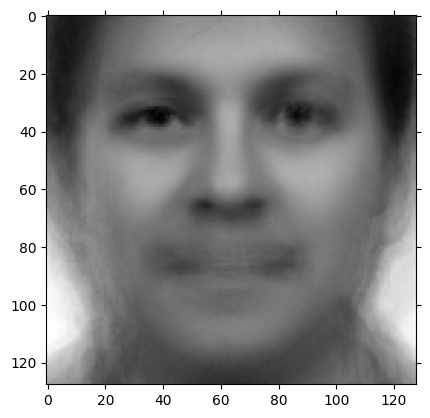

ini mean_face
[[ 74.43076923  68.04615385  64.12307692 ...  60.10769231  68.26153846
   73.66153846]
 [ 73.23076923  67.87692308  62.26153846 ...  59.66153846  67.47692308
   74.18461538]
 [ 70.12307692  66.30769231  61.58461538 ...  59.47692308  65.4
   69.63076923]
 ...
 [146.50769231 144.89230769 145.55384615 ... 125.66153846 130.12307692
  134.61538462]
 [142.18461538 142.63076923 136.93846154 ... 121.63076923 125.67692308
  129.93846154]
 [139.07692308 135.56923077 132.03076923 ... 121.75384615 121.43076923
  128.81538462]]
[[  9   0 252 ...  62  71 112]
 [  7   1 254 ...  99 116 154]
 [249 249 249 ...  95 118 106]
 ...
 [108  78  71 ...  22  67 109]
 [ 91  84  60 ...  18  28  24]
 [ 92  68  38 ...  11  27  23]]
[[254 255 254 ... 252   9  37]
 [242 246 249 ...  10  32  40]
 [236 241 247 ... 254  16  57]
 ...
 [103 101 107 ... 126 121 117]
 [111 112 115 ... 130 126 122]
 [107 103  68 ... 130 130 123]]
[[218 221 224 ... 235 251 227]
 [212 223 227 ... 239 248 235]
 [208 223 226 ... 2

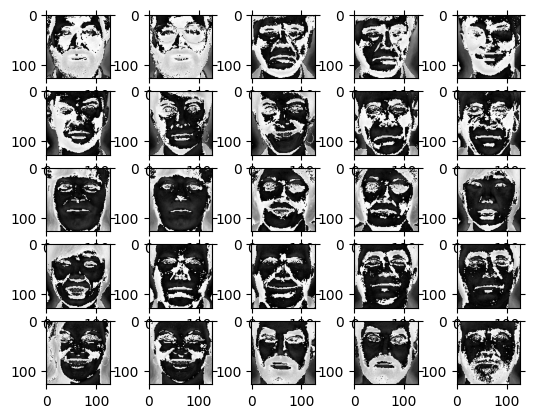

In [15]:
if use_gpu:
    memory = cp.get_default_memory_pool()
    memory.set_limit(size=3*1024**3)
import time

images = batch_load("./Images1/")

print(images.shape)
# time1 = time.time()

# mean_face = np.zeros((256,256))

# for i in images:
#     mean_face = np.add(mean_face,i)
#     print(i.shape)

# print("mean_face shape")
# print(mean_face.shape)
# mean_face = np.divide(mean_face,float(len(images))).flatten().reshape(256,256)
# print(mean_face.shape)
# plt.imshow(mean_face, cmap='gray')
# plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
# plt.show()

# print(mean_face.shape)
# normalized: cp.ndarray = normalize_array(images)
normalize_array(images)
# images = None

# for i in range(25):
#     plt.subplot(5,5,1+i)
#     plt.imshow(normalized[i], cmap="gray")
#     plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
# plt.show()


# if use_gpu:
#     memory.free_all_blocks()

# M = normalized.shape[0]

# print(f"Normalized shape {normalized.shape}")
# print(f"Normalized dtype {normalized.dtype}")
# print("NORMALIZED")
# print(normalized[0])

# time2 = time.time()
# covariance = cp.asarray(
#     [cp.matmul(arr.astype(cp.float32), arr.transpose().astype(cp.float32), dtype=cp.float32) for arr in normalized],
# ).mean(axis=0, dtype=cp.float32)

# if use_gpu:
#     memory.free_all_blocks()

# print(f"Covariance shape {covariance.shape}")
# print(f"Covariance dtype {covariance.dtype}")
# time3 = time.time()

# print(f"Normalization {time2-time1}")
# print(f"Covariance matmul {time3-time2}")


# print(cp.asnumpy(covariance))
# print(covariance)


In [16]:
import numpy as np

A = np.array([[3,0],[8,-1]])
# A = A + A.T   # a symmetric real matrix is a hermitian matrix
n = A.shape[0]

eval_A, evec_A = np.linalg.eig(A)

# Numpy way of calculating eigen vector
def evec_from_numpy(A):
    _, evec_A = np.linalg.eig(A)
    return evec_A

# Let's assume we have already know eval_A but not evec_A
def evec_from_eval(A, eval_A):
    n = A.shape[0]
    evec_A = np.zeros((n, n))
    for k in range(n):
        M = np.delete(A, k, axis=0)
        M = np.delete(M, k, axis=1)
        eval_M = np.linalg.eigvals(M)

        nominator = [np.prod(eval_A[i] - eval_M) for i in range(n)]
        denominator = [np.prod(np.delete(eval_A[i] - eval_A, i)) for i in range(n)]

        evec_A[k, :] = np.array(nominator) / np.array(denominator)
    return evec_A

evec_A_from_eval = np.zeros((n, n))
evec_A_from_eval = evec_from_eval(A, eval_A)

print(evec_A_from_eval)
print(evec_A**2)

np.allclose(evec_A_from_eval, evec_A**2)

[[-0.  1.]
 [ 1.  0.]]
[[0.  0.2]
 [1.  0.8]]


False